In [1]:
import pandas as pd
import os
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter


path = "C:/Users/carol/DataSience/data/return-data/"
files = ([f for f in os.listdir(path) if f.endswith('.txt')])
df_list = []

for file in files:
    with open(path+file, 'r') as f:
        for line in f:
            data = json.loads(line)
            df_list.append(data)
dataframe = pd.DataFrame.from_dict(df_list)
count = dataframe['basket'].apply(pd.value_counts).fillna(0)
dataframe = dataframe.join(count)




C:\Users\carol\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9765591397849462


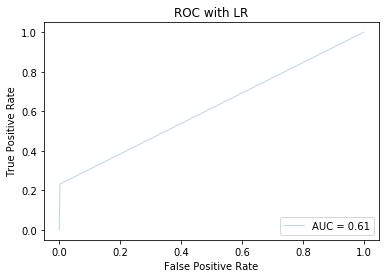

0.9710752688172043


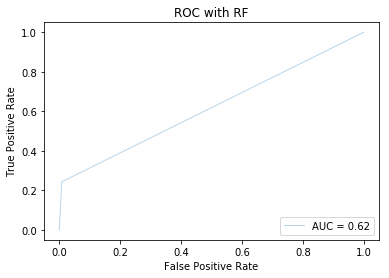

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(axis=1,columns=['basket','returnLabel','transactionId','zipCode']),dataframe['returnLabel'], test_size=0.30,random_state=101)
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
pred = pred.astype(int)
y_test = y_test.values.astype(int)
fpr,tpr,_ = roc_curve(y_test,pred,pos_label=1)
roc_auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
              label='AUC = %0.2f' %  roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with LR')
plt.legend(loc="lower right")
plt.show()

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
pred = pred.astype(int)
fpr,tpr,_ = roc_curve(y_test,pred,pos_label=1)
roc_auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
              label='AUC = %0.2f' %  roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with RF')
plt.legend(loc="lower right")
plt.show()